In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import regularizers

In [2]:
path = '../input/compresive-strength-concrete/'
file = path + 'compresive_strength_concrete.csv'

In [5]:
import io
df = pd.read_csv("../input/compresive-strength-concrete/compresive_strength_concrete.csv")

In [6]:
df = pd.read_csv(file)
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.shape

(1030, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [9]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df[df.duplicated()]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [11]:
normalized_data=df.copy()

x_data = normalized_data.iloc[:,:8]
x_label = normalized_data.iloc[:,-1:]

In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(x_data, x_label, test_size = 0.3, random_state = 1)

In [13]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data= (train_data-mean)/std
test_data = (test_data-mean)/std

In [14]:
model = models.Sequential()
model.add(layers.Dense(96, kernel_regularizer=regularizers.l1(l1=.001), activation = "relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(6, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [15]:
history=model.fit(train_data, train_labels, epochs=100 , validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 1482.6731 - mae: 34.8871 - val_loss: 1529.5961 - val_mae: 35.1066
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 1385.3096 - mae: 33.5409 - val_loss: 1397.5851 - val_mae: 33.3040
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 1295.0191 - mae: 31.7916 - val_loss: 1219.1912 - val_mae: 30.7422
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1095.4242 - mae: 28.9847 - val_loss: 1001.7166 - val_mae: 27.3364
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 855.9522 - mae: 25.0866 - val_loss: 754.2325 - val_mae: 22.9247
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 635.6032 - mae: 21.1095 - val_loss: 512.4894 - val_mae: 17.8754
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 376.9572 - mae: 15.2801 - val_loss: 323.3031 - val_mae: 13.7950
Epoch 8/100
18/18 [=============

18/18 [==============================] - 0s 4ms/step - loss: 46.6433 - mae: 5.0600 - val_loss: 73.8106 - val_mae: 6.5264
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 46.8003 - mae: 5.0546 - val_loss: 72.4760 - val_mae: 6.5178
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 46.2845 - mae: 5.1269 - val_loss: 69.3976 - val_mae: 6.3664
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 41.6170 - mae: 4.8669 - val_loss: 67.1784 - val_mae: 6.2193
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 42.1416 - mae: 4.8463 - val_loss: 65.4143 - val_mae: 6.0344
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 43.1619 - mae: 4.9612 - val_loss: 66.2350 - val_mae: 6.0897
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 37.8809 - mae: 4.5119 - val_loss: 63.0665 - val_mae: 5.9255
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 3

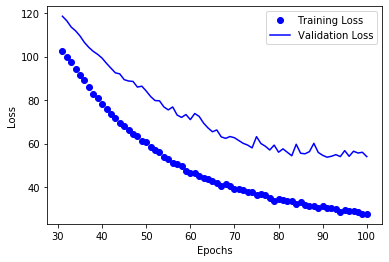

In [16]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs[30:], loss[30:], "bo", label="Training Loss")
plt.plot(epochs[30:], val_loss[30:], "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

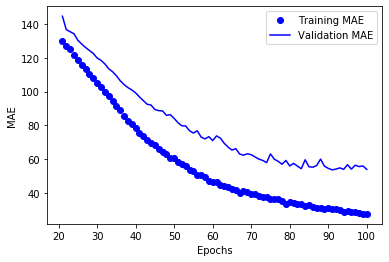

In [17]:
mae=history.history["mae"]
val_mae=history.history["val_mae"]
epochs=range(1, len(mae)+1)
plt.plot(epochs[20:], loss[20:], "bo", label="Training MAE")
plt.plot(epochs[20:], val_loss[20:], "b", label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(96, kernel_regularizer=regularizers.l1(l1=.001), activation = "relu", input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(8, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(6, kernel_regularizer=regularizers.l1(l1=.001),activation="relu"))
model.add(layers.Dense(1))
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [19]:
model.fit(train_data, train_labels, epochs=100)

Epoch 1/100
23/23 [==============================] - 1s 1ms/step - loss: 1481.5375 - mae: 34.6988
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 1539.9990 - mae: 35.5032
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 1563.1268 - mae: 35.8077
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 1551.8938 - mae: 35.6639
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 1463.8650 - mae: 34.4010
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 1476.9251 - mae: 34.5585
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 1420.6576 - mae: 33.9389
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 1194.9344 - mae: 30.9765
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 1179.3164 - mae: 30.4292
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 926.5991 - mae: 26.6024
Epoch 11/100
23/23 [

23/23 [==============================] - 0s 1ms/step - loss: 88.6721 - mae: 7.2680
Epoch 86/100
23/23 [==============================] - 0s 1ms/step - loss: 86.7405 - mae: 7.1993
Epoch 87/100
23/23 [==============================] - 0s 1ms/step - loss: 81.7388 - mae: 7.1351
Epoch 88/100
23/23 [==============================] - 0s 1ms/step - loss: 91.5889 - mae: 7.5606
Epoch 89/100
23/23 [==============================] - 0s 1ms/step - loss: 87.9018 - mae: 7.3588
Epoch 90/100
23/23 [==============================] - 0s 1ms/step - loss: 83.1220 - mae: 7.0326
Epoch 91/100
23/23 [==============================] - 0s 1ms/step - loss: 94.8048 - mae: 7.5850
Epoch 92/100
23/23 [==============================] - 0s 1ms/step - loss: 82.5237 - mae: 7.0778
Epoch 93/100
23/23 [==============================] - 0s 1ms/step - loss: 81.2831 - mae: 7.0947
Epoch 94/100
23/23 [==============================] - 0s 1ms/step - loss: 76.8847 - mae: 6.7563
Epoch 95/100
23/23 [==============================] -

In [20]:
test_mse_scoe, test_mae_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 101.8720 - mae: 7.9495


In [21]:
test_mae_score

7.949485778808594

In [22]:
denormalized = test_labels

In [23]:
prediction=model.predict(test_data)

In [24]:
pred_norm=prediction

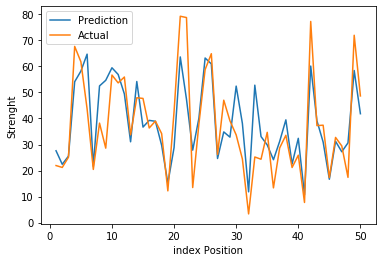

In [25]:
plt.plot(range(1, len(pred_norm[:300:6])+1), pred_norm[:300:6], label="Prediction")
plt.plot(range(1, len(pred_norm[:300:6])+1), denormalized[:300:6], label="Actual")
plt.xlabel("index Position")
plt.ylabel("Strenght")
plt.legend()
plt.show()